In [1]:
from mavis import *
# calcolo sulla GPU: quasi fatto, maca psd generation (facile) fitting (boh)

# caclolare la psf short exposure (Fatto)
# avendo la psf:
# 1. calcolare il profilo radiale della psf (Fatto)
# 2. n-square energy, energia che sta dentro quadrati di lato crescente (Fatto)
# 3. FWHM ( date le 2 varianze: FWHM = 0.5 * k * sqrt( sigma1 + sigma2)   )
# 4. Strehl ()
# 5. Convoluzione con un kernel della PSF: (Fatto)
#    kernel, nello stesso spazio della psf
# costruzione del kernel a partire da orientamento degli assi (un angolo)
# e matrice di covarianzaoppure le due FWHM ()


In [2]:
Field_size = 1024*8
defaultArrayBackend=cp
f2 = Field(550e-9, Field_size, 32*4, 'm' )
f2.setAsTelescopeMask(4,0)

In [3]:
%%timeit
f2.pupilToPsf()

1.13 ms ± 43.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
Field_size = 1024*8
defaultArrayBackend=np
f2 = Field(550e-9, Field_size, 32*4, 'm', np, np.float)
f2.setAsTelescopeMask(4,0)

In [5]:
%%timeit
f2.pupilToPsf()

19.3 s ± 5.04 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


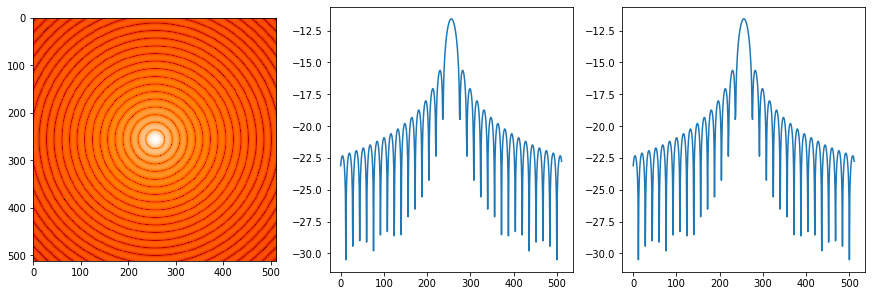

(6.665420253686126e-08, 6.665420253686126e-08)
Wavelength:  5.5e-07
Grid side elements:  8192
width:  3.52e-05 [ rad ]
width:  7260.528 [ mas ]
pixel_size:  4.296875e-09 [ rad ]
pixel_size:  0.886294921875 [ mas ]


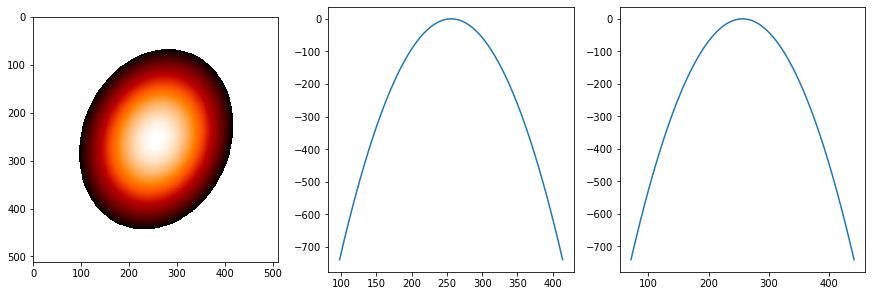

Wavelength:  5.5e-07
Grid side elements:  8192
width:  3.52e-05 [ rad ]
width:  7260.528 [ mas ]
pixel_size:  4.296875e-09 [ rad ]
pixel_size:  0.886294921875 [ mas ]


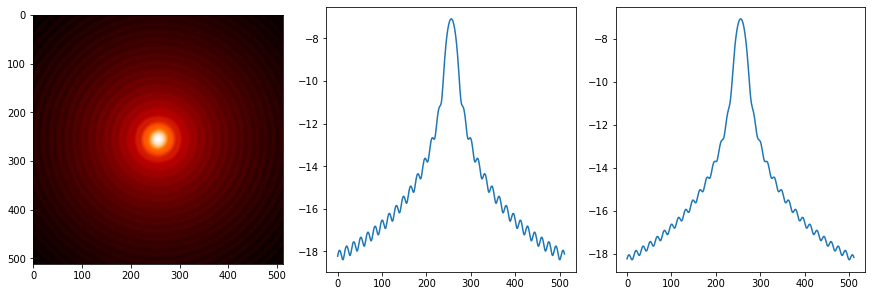

Wavelength:  5.5e-07
Grid side elements:  8192
width:  3.52e-05 [ m ]
pixel_size:  4.296875e-09 [ m ]


/home/frossi/anaconda3/envs/cuda/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


(7.716949393577643e-08, 8.296934094756028e-08)


In [6]:
f2 = Field(550e-9, Field_size, 32*4)
f2.setAsTelescopeMask(4,0)
f2.pupilToPsf()
f2.standardPlot(True, zoom=8)


f1 = Field(550e-9, Field_size, 32*4)
f1.setAsTelescopeMask(4,0)
f1.pupilToPsf()
print(f1.FWHM())

f1.printStatus()

f1.setAsGaussianKernel(f1.pixel_size*4, f1.pixel_size*5, np.pi/8.0)
f1.standardPlot(True, zoom=8)
f1.printStatus()

f3 = convolve(f2, f1)
f3.standardPlot(True, zoom=8)
f3.printStatus()
print(f3.FWHM())

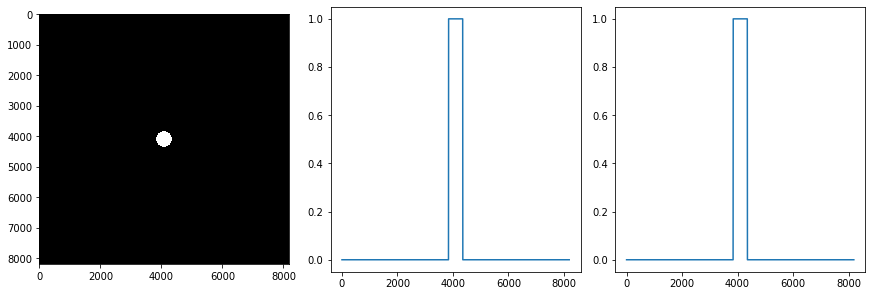

Wavelength:  5.5e-07
Grid side elements:  8192
width:  128.0 [ m ]
pixel_size:  0.015625 [ m ]


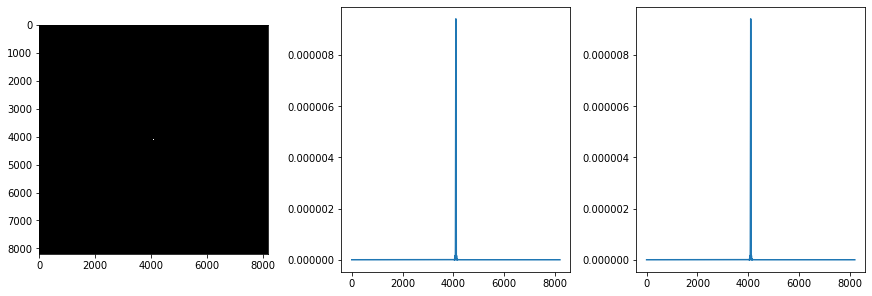

Wavelength:  5.5e-07
Grid side elements:  8192
width:  3.52e-05 [ rad ]
width:  7260.528 [ mas ]
pixel_size:  4.296875e-09 [ rad ]
pixel_size:  0.886294921875 [ mas ]


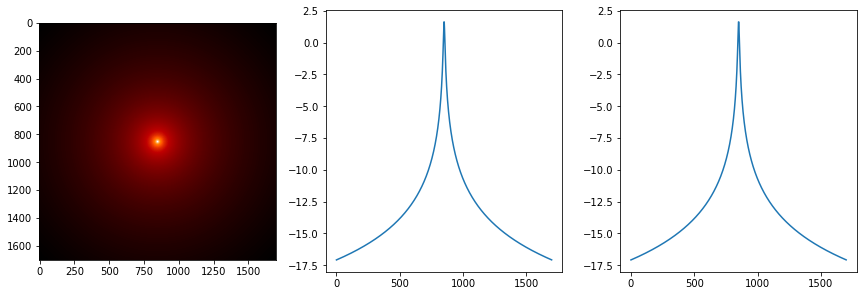

Wavelength:  5.5e-07
Grid side elements:  1700
width:  13.281250000000004 [ m ]
pixel_size:  0.007812500000000002 [ m ]


In [7]:
f1 = Field(550e-9, Field_size, 16*TelescopeDiameter)
f1.setAsTelescopeMask(TelescopeDiameter/2,0)
f1.standardPlot()
f1.printStatus()

f1.pupilToPsf()
#f1.pupilToOtf()
f1.standardPlot()
f1.printStatus()

f2 = Field(550e-9, 1700, 16*TelescopeDiameter)

r0_ = 0.8
L0_ = 25.0
l0_ = 0.005
f2.setAsPSD(16*TelescopeDiameter, r0_, L0_, l0_)
f2.standardPlot(True)
f2.printStatus()

# _, _, f_turb = turbolenceFormulas.getFormula('phaseSpatialPowerSpectrumVonKarman')
# r0 = 0.9759 * 0.5/(seeing*4.848)
# vk_l[*,*,i] = (24/5.*gamma(6/5.))^(5./6)*gamma(11/6.)^2/(2*!pi^(11./3))*r0^(-5./3)*(freqs_x^2.+freqs_y^2.+1./L0^2.)^(-11./6)

grid_diameter: 30.45523489932886
up_factor: 4


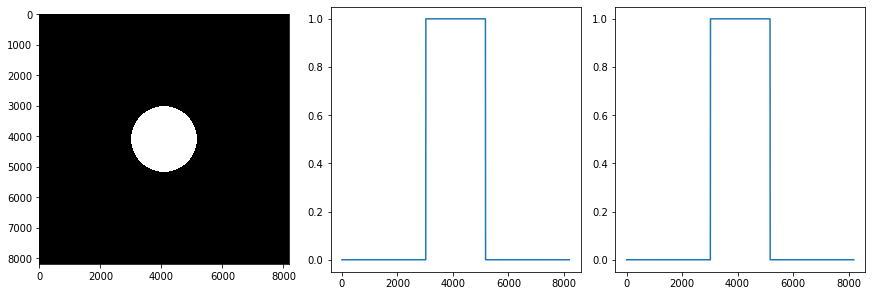

Wavelength:  5.5e-07
Grid side elements:  8192
width:  30.45523489932886 [ m ]
pixel_size:  0.00371768004142198 [ m ]


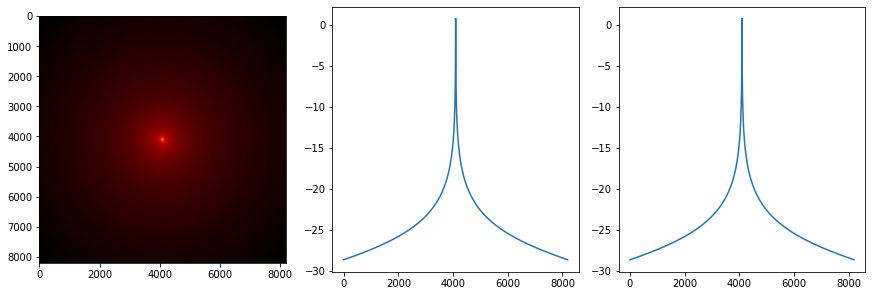

Wavelength:  5.5e-07
Grid side elements:  8192
width:  268.98495536412776 [ m ]
pixel_size:  0.03283507755909763 [ m ]


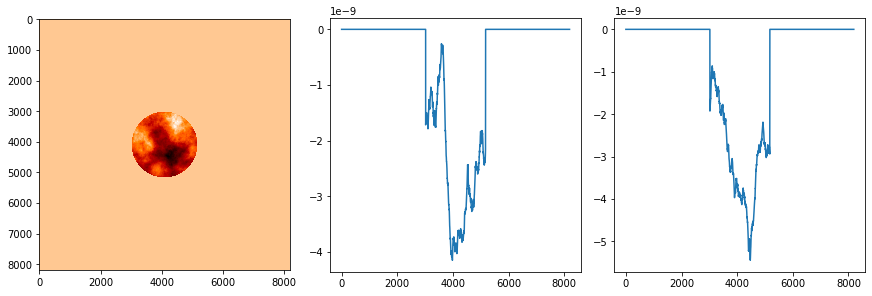

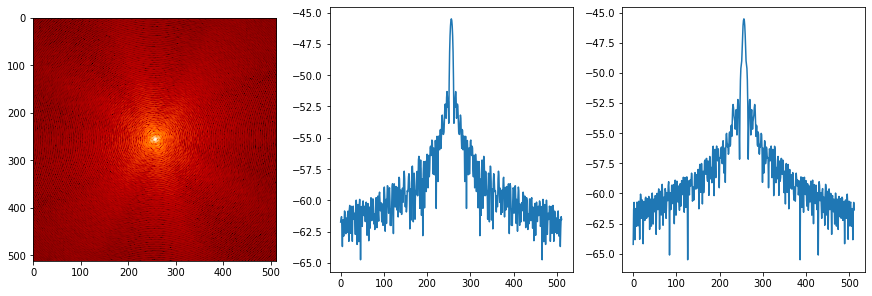

Wavelength:  5.5e-07
Grid side elements:  8192
width:  0.0001479417254502703 [ rad ]
width:  30515.2 [ mas ]
pixel_size:  1.8059292657503697e-08 [ rad ]
pixel_size:  3.725 [ mas ]
Diffraction limeted psf peak: 0.0030716585717317437
Actual psf peak: 1.7597410497141322e-20
Strehl: 5.728960457743919e-18


In [8]:
N = Field_size
wvl = 550e-9 # lambda
pixel_psf = 14.9 # mas
tel_radius = TelescopeDiameter/2

fit_factor = 3.0
up_factor = 1

pixel_psf_upsampled = (pixel_psf / up_factor) / radiansToMas
pitch = wvl / (pixel_psf_upsampled * N) # rad

while pitch*N < 2*tel_radius*fit_factor:
    up_factor += 1
    pixel_psf_upsampled = (pixel_psf / up_factor) / radiansToMas
    pitch = wvl / (pixel_psf_upsampled * N) # rad

grid_diameter = pitch*N
    
print('grid_diameter:', grid_diameter)
print('up_factor:', up_factor)

freq_range = 1.0/pitch

mask = Field(wvl, N, pitch*N)
mask.setAsTelescopeMask(tel_radius, 0)
mask.standardPlot()
mask.printStatus()

psd = Field(wvl, N, freq_range)

r0_ = 0.8
L0_ = 25.0
l0_ = 0.005
psd.setAsPSD(grid_diameter, r0_, L0_, l0_)
psd.standardPlot(True)
psd.printStatus()

#myResult= longExposurePsf(mask, psd)
#myResult.normalize()
##myResult.downSample(up_factor)
#myResult.standardPlot(True)
#myResult.printStatus()

psd.PSDToPhaseScreen()
phaseScreen = psd
myResult2= shortExposurePsf(mask, phaseScreen)
#myResult2.normalize()
#myResult2.downSample(up_factor)
myResult2.standardPlot(True, zoom=8)
myResult2.printStatus()


print( 'Strehl:', StrehlFromMask(myResult2, mask ) )

16.0
1.8035123670748432
max residual: 9.10467841772369e-22


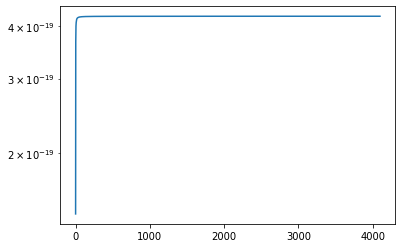

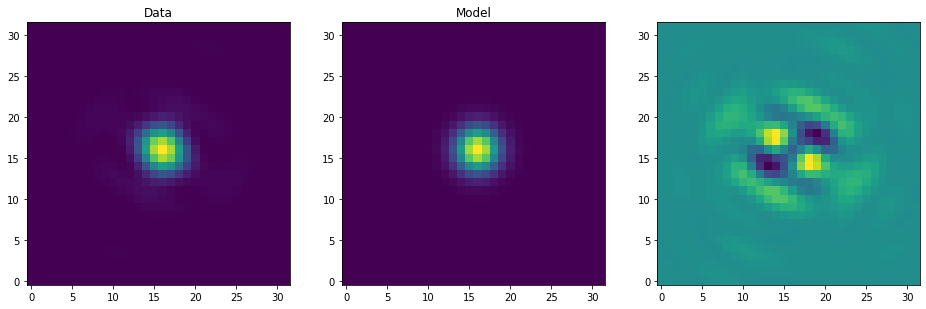

In [9]:
    
#pp = myResult.radial_profile([myResult.N/2.0, myResult.N/2.0] )
#plt.plot( xp.log( pp ) )

pp = myResult2.n_square_energy([myResult2.N/2.0, myResult2.N/2.0] )
plt.xscale('linear')
plt.yscale('log')
plt.plot( hostData(cp.asarray(cp.arange(1,myResult2.N/2.0+2))), hostData(pp) )

nn=32
s1 = centralSquare(myResult2.sampling, nn)
z = hostData(cp.copy(s1))
y, x = np.mgrid[:nn, :nn]
fit_p, p_init = fitGaussian(z)
p = fit_p(p_init, x, y, z)

print(p.x_mean.value)
print(p.x_stddev.value)

plt.figure(figsize=(8*2, 5))
plt.subplot(1, 3, 1)
plt.imshow(z, origin='lower', interpolation='nearest')
plt.title("Data")
plt.subplot(1, 3, 2)
plt.imshow(p(x, y), origin='lower', interpolation='nearest')
plt.title("Model")
plt.subplot(1, 3, 3)
residual = z - p(x, y)
print('max residual:', np.max(residual))
plt.imshow(residual, origin='lower', interpolation='nearest')
# plt.title("Residual")


In [10]:

from sympy import FourierTransform
from sympy.abc import x, y, k, h

afunction = sp.exp(-x**2)

afunction2 = sp.exp(-x**2-y**2)

ft1 = FourierTransform(afunction, x, k)
ft2 = FourierTransform(afunction2, (x,y), (k,h) )

display(ft1)
display(ft2)
#rr = ft1.doit()
#display(rr)


#    print(inspect.getsource(ffr))

def fourier_transform_dicretized(function, vIn, vOut):
    ffr = sp.lambdify(x, function, modules= ["numpy"] )
    va = ffr(vIn)
    rr = xp.real( xp.fft.fftshift( xp.fft.fft( xp.fft.fftshift(va) ) ) )
    return rr

def inverse_fourier_transform_dicretized(function, vIn, vOut):
    ffr = sp.lambdify(x, function, modules= ["numpy"] )
    va = ffr(vIn)
    rr = xp.real( xp.fft.fftshift( xp.fft.ifft( xp.fft.fftshift(va) ) ) )
    return rr


def fourier_transform_dicretized2(function, vIn, vOut):
    ffr = sp.lambdify((x,y), function, modules= ["numpy"] )
    va = ffr(vIn)
    rr = xp.real( xp.fft.fftshift( xp.fft.fft2( xp.fft.fftshift(va) ) ) )
    return rr


ftlib = { "FourierTransform": fourier_transform_dicretized, "InverseFourierTransform": inverse_fourier_transform_dicretized }

libraries = [ftlib, "scipy"]  

inFunc = sp.lambdify(x, afunction, modules= libraries)

ftl = sp.lambdify(x, ft1, modules= libraries)


vx = xp.arange(-8,8,0.25)
vy = xp.arange(-8,8,0.25)



plt.plot( vx, inFunc(vx) )
plt.show()
plt.plot( vx, ftl(vx) )
plt.show()

ftlib = { "FourierTransform": fourier_transform_dicretized2, "InverseFourierTransform": inverse_fourier_transform_dicretized }

libraries = [ftlib, "scipy"]  

inFunc = sp.lambdify((x,y), afunction2, modules= libraries)

ftl = sp.lambdify((x,y), ft2, modules= libraries)


vx = xp.arange(-8,8,0.25)
vy = xp.arange(-8,8,0.25)

plt.imshow( inFunc(vx, vy) )
plt.show()
plt.plot( vx, ftl(vx) )
plt.show()


                ⎛   2      ⎞
                ⎜ -x       ⎟
FourierTransform⎝ℯ   , x, k⎠

                ⎛    2    2                ⎞
                ⎜ - x  - y                 ⎟
FourierTransform⎝ℯ         , (x, y), (k, h)⎠

NameError: name 'xp' is not defined

In [ ]:
telescope_diameter = 8.2 # [m]
focal_distance = 120.0   # [m]
Fn = focal_distance/telescope_diameter # []
na = 1.0 / Fn / 2.0      # []
plate_scale_rad = 1.0 / focal_distance # [rad / m]
plate_scale_mas = radiansToMas / focal_distance # [mas / m]
print('plate_scale_mas:', plate_scale_mas)
ccd_w_mas = 30.0 * 1000.0 # MAVIS has a 30 arcsec
# ccd_w_mas = plate_scale_mas * ccd_w_meters
print('CCD size [mas]:', ccd_w_mas)
ccd_w_meters = ccd_w_mas / plate_scale_mas
print('CCD size [m]:', ccd_w_meters)

In [ ]:
# pup_plane_width = 0.0024986730 # pixel size in pupil plane in arcsec
pitch = 0.0564706 # meters, pixel size of the mask
freq_range = 1.0/pitch
N = 1700
wvl = 550e-9 # lambda

mask = Field(wvl, N, pitch*N)
mask.loadSamplingFromFile('MASK4fabio.fits')

psd = Field(wvl, N, freq_range)
psd.loadSamplingFromFile('PSD4fabio.fits')

# .... wrong width and unit ....
result = Field(wvl, N, 32*4)
result.loadSamplingFromFile('PSF4fabio.fits')
result.normalize()

In [ ]:
myResult= longExposurePsf(mask, psd)
myResult.normalize()
myResult.standardPlot(True)
myResult.printStatus()
result.standardPlot(True)
twoPsfsPlot(result.sampling, myResult.sampling)
print('Max of the difference of the two PSFs:', xp.max(result.sampling-myResult.sampling))

In [ ]:
#wvl = 1650e-9
wvl = 550e-9 # lambda
kk = 2.0*xp.pi / wvl / 1e9


def telescope_mask(N, grid_diameter, telescope_radius, occlusion_radius=0):
    pixel_size = grid_diameter/float(N) 
    half_pixel_size = pixel_size/2.0
    grid = xp.zeros((N,N), dtype=xp.float64)
    fx = (xp.arange( -N/2., N/2., 1.0) + 0.5 )* pixel_size
    (fx,fy) = xp.meshgrid(fx,fx)
    grid = xp.where(xp.logical_or(fx**2+fy**2>telescope_radius**2 , fx**2+fy**2<occlusion_radius**2) , 0.0, 1.0)
#    grid = xp.where( fx**2+fy**2>telescope_radius**2 , 0.0, 1.0)
    return grid, pixel_size

def standardPsfPlot(img, log=False):
    img1 = xp.copy(img)
    if log:
        img1 = xp.log(xp.absolute(img))
    fig, axs = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
    s = img1.shape[0]
    axs[0].imshow(img1, cmap='jet')
    axs[1].plot(img1[s//2, :])
    axs[2].plot(img1[:, s//2])
    plt.show()


# unit='meters' or 'mas'
# in_pixel_size is assumend in meters
# out_pixel_size always in radians, convert outside this if needed

def computePsfFromMask(input_grid, in_pixel_size): #, unit='mas'): 
    N = input_grid.shape[0]
    psf = xp.square(xp.absolute(ft_ift2(input_grid)))    
    # angular pixel size
    in_grid_size = in_pixel_size * N
    # compute in radians
    out_pixel_size = wvl / in_grid_size
#    # compute in mas
#    out_pixel_size *= radiansToMas        
#    if unit == 'meters':
#        out_pixel_size /= plate_scale_mas
    return psf, out_pixel_size

def computeOtfFromMask(mask, in_pixel_scale):
    telescopePsf, psf_pix = computePsfFromMask(mask, in_pixel_scale)
    otf_tel = ft_ft2(telescopePsf)
    out_pixel_scale = in_pixel_scale
    return otf_tel, out_pixel_scale


# definisco io implicitamente pixel_size = w/N
mgrid, mpixel = telescope_mask(Field_size, 32*4, 4, 0)
print('mpixel:', mpixel)
plt.imshow(mgrid)
plt.show()

psf1, ppixel1 = computePsf(mgrid, mpixel, 'mas')
print('ppixel1:', ppixel1)

standardPsfPlot(psf1, log=False)

_, _, f_turb = turbolenceFormulas.getFormula('phaseSpatialPowerSpectrumVonKarman')
display(f_turb)

# generate a phase screen
NN = 1700
telescope_diameter = 8.0
telescope_pixel_scale = telescope_diameter/float(NN)
freq_range = 1.0/telescope_pixel_scale

# r0 = 0.9759 * 0.5/(seeing*4.848)
# vk_l[*,*,i] = (24/5.*gamma(6/5.))^(5./6)*gamma(11/6.)^2/(2*!pi^(11./3))*r0^(-5./3)*(freqs_x^2.+freqs_y^2.+1./L0^2.)^(-11./6)

r0_ = 0.8
L0_ = 25.0
l0_ = 0.005
method='VonKarman'

atm_psd, psd_pix = ft_PSD_phi(r0_, NN, freq_range, L0_, l0_, method)
print('psd_pix:', psd_pix)
standardPsfPlot(atm_psd, log=True)


def longExposurePsf(mask, psd, pmask, ppsd):
    
    print('mask pixel size: ', pmask)
    print('psd pixel size: ', ppsd)

    n1 = psd.shape[0]
    freq_range = n1 * ppsd
    pitch = 1.0 / freq_range
    # step 0 : compute telescope otf
    otf_tel, _ = computeOtfFromMask(mask, pmask)    
    # step 1 : compute phase autocorrelation
    B_phi = xp.real(  xp.fft.ifft2(xp.fft.ifftshift(psd) ) ) * ( kk * freq_range ) ** 2
    b0 = B_phi[0,0]
    B_phi = xp.fft.fftshift(B_phi)
    # step 2 : compute structure function
    D_phi = 2.0*( -B_phi + b0)
    # step 3 : compute turbolence otf
    otf_turb = xp.exp(-0.5*(D_phi))
    p_otft_turb = pitch
    
    print('otf_tel pixel size: ', pmask)
    print('otf_turb pixel size: ', p_otft_turb)

    #fare in modo che pmask == pitch
    # step 4 : combine telescope and turbolence otfs
    otf_system = otf_turb * otf_tel
    # step 5 : system otf to system psf
    result = xp.real(ft_ft2(otf_system))
    p_final_psf = wvl / (pitch * n1) # radianti
    
    print('p_final_psf pixel size [rad]: ', p_final_psf)
    print('p_final_psf pixel size [mas]: ', p_final_psf*radiansToMas)
    
    return result, p_final_psf

In [ ]:
   
showInput=False

# MASK4fabio.fits  PSD4fabio.fits  PSF4fabio.fits
# Lo step in frequenza della PSD è 0.0104167m^{-1} per un pitch di 0.0564706m (1/(1700.*0.0564706)=0.0104167). 
# La PSF è calcolata per una lunghezza d'onda di 550nm e un FoV di 2arcsec (pixel 0.0024986730arcsec). 

pitch = 0.0564706 # meters
pup_plane_width = 0.0024986730 # pixel size in pupil plane in arcsec

ll = 550e-9 # lambda
kk = xp.pi * 2.0 / ll / 1e9 # from meters to radians
print('kk:', kk)
hdul = fits.open('MASK4fabio.fits')
mask = xp.asarray(hdul[0].data, xp.float64)
hdul = fits.open('PSD4fabio.fits')
print(hdul.info())

psd = xp.asarray(hdul[0].data, dtype=xp.float64)

standardPsfPlot(psd)

psf = xp.square(xp.absolute(ft_ift2(mask)))
standardPsfPlot(xp.log(xp.absolute(psf)))

n1 = psd.shape[0]
print('n1:', n1)
freq_range = 1.0 / pitch
df = 1.0 / (n1 * pitch) # pixel size of the psd in m**-1

otf_tel = ft_ft2(psf)
standardPsfPlot(xp.absolute(otf_tel))

B_phi = xp.real(  xp.fft.ifft2(xp.fft.ifftshift(psd) ) ) * ( kk * freq_range ) ** 2
b0 = B_phi[0,0]
B_phi = xp.fft.fftshift(B_phi)

print('max B_phi:', xp.max(B_phi))
print('min B_phi:', xp.min(B_phi))

standardPsfPlot(xp.log(xp.absolute((B_phi))))

D_phi = 2.0*( -B_phi + b0)
standardPsfPlot(xp.log(xp.absolute(D_phi)))

print('max D_phi:', xp.max(D_phi))
print('min D_phi:', xp.min(D_phi))

otf_turb = xp.exp(-0.5*(D_phi))
standardPsfPlot(xp.log(xp.absolute(otf_turb)))

otf_system = otf_turb * otf_tel
standardPsfPlot(xp.log(xp.absolute(otf_system)))

myresult = xp.real(ft_ft2(otf_system))
myresult = myresult / xp.sum(myresult)

standardPsfPlot(xp.log(xp.absolute(myresult)))

hdul = fits.open('PSF4fabio.fits')
result = hdul[0].data
result = result / xp.sum(result)

standardPsfPlot(xp.log(xp.absolute(result)))

plt.xscale('linear')
plt.yscale('log')
plt.plot(result[:,result.shape[0]//2])
plt.plot(myresult[:,myresult.shape[0]//2])
plt.show()

print(xp.max(result-myresult))


In [ ]:
   
showInput=False

# MASK4fabio.fits  PSD4fabio.fits  PSF4fabio.fits
# Lo step in frequenza della PSD è 0.0104167m^{-1} per un pitch di 0.0564706m (1/(1700.*0.0564706)=0.0104167). 
# La PSF è calcolata per una lunghezza d'onda di 550nm e un FoV di 2arcsec (pixel 0.0024986730arcsec). 

pitch = 0.0564706 # meters
pup_plane_width = 0.0024986730 # pixel size in pupil plane in arcsec

ll = 550e-9 # lambda
kk = xp.pi * 2.0 / ll / 1e9 # from meters to radians
print('kk:', kk)
hdul = fits.open('MASK4fabio.fits')
mask = xp.asarray(hdul[0].data, xp.float64)
hdul = fits.open('PSD4fabio.fits')
print(hdul.info())

psd = xp.asarray(hdul[0].data, dtype=xp.float64)

standardPsfPlot(psd)

psf = xp.square(xp.absolute(ft_ift2(mask)))
standardPsfPlot(xp.log(xp.absolute(psf)))

n1 = psd.shape[0]
print('n1:', n1)
freq_range = 1.0 / pitch
df = 1.0 / (n1 * pitch) # pixel size of the psd in m**-1

otf_tel = ft_ft2(psf)
standardPsfPlot(xp.absolute(otf_tel))

B_phi = xp.real(  xp.fft.ifft2(xp.fft.ifftshift(psd) ) ) * ( kk * freq_range ) ** 2
b0 = B_phi[0,0]
B_phi = xp.fft.fftshift(B_phi)

print('max B_phi:', xp.max(B_phi))
print('min B_phi:', xp.min(B_phi))

standardPsfPlot(xp.log(xp.absolute((B_phi))))

D_phi = 2.0*( -B_phi + b0)
standardPsfPlot(xp.log(xp.absolute(D_phi)))

print('max D_phi:', xp.max(D_phi))
print('min D_phi:', xp.min(D_phi))

otf_turb = xp.exp(-0.5*(D_phi))
standardPsfPlot(xp.log(xp.absolute(otf_turb)))

otf_system = otf_turb * otf_tel
standardPsfPlot(xp.log(xp.absolute(otf_system)))

myresult = xp.real(ft_ft2(otf_system))
myresult = myresult / xp.sum(myresult)

standardPsfPlot(xp.log(xp.absolute(myresult)))

hdul = fits.open('PSF4fabio.fits')
result = hdul[0].data
result = result / xp.sum(result)

standardPsfPlot(xp.log(xp.absolute(result)))

plt.xscale('linear')
plt.yscale('log')
plt.plot(result[:,result.shape[0]//2])
plt.plot(myresult[:,myresult.shape[0]//2])
plt.show()

print(xp.max(result-myresult))
